In [2]:
import healpy as hp
import pandas as pd
import numpy as np

In [3]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [4]:
from tqdm import tqdm_notebook

In [5]:
patch = pd.read_csv('/home/rt2122/data/new/try/typdat_il2_ip0_ra129.0758_dec65.6675_stcl_in5.csv', 
                    index_col='Unnamed: 0')
patch.index.name='index'
patch.index = np.arange(patch.shape[0])

In [8]:
patch.head()

,objID,l,b,gPSFFlux,gKronFlux,rPSFFlux,rKronFlux,iPSFFlux,iKronFlux,zPSFFlux,zKronFlux,yPSFFlux,yKronFlux,pix
index,,,,,,,,,,,,,,
0,185721288297399836,150.951278,35.351899,6.960980e-07,NaN,1.012100e-06,NaN,2.065530e-06,0.000003,-7.097490e-07,NaN,3.204210e-06,NaN,23711087867
1,185721288638078505,150.949115,35.366349,1.782060e-06,0.000003,3.691760e-07,NaN,2.932630e-07,NaN,-6.903210e-07,NaN,-6.257910e-08,NaN,23711110526
2,185721288742356513,150.950026,35.371037,2.452230e-06,0.000005,2.512580e-07,NaN,-1.022000e-06,NaN,-3.267670e-07,NaN,-1.029660e-06,NaN,23711154356
3,185721288823868724,150.946970,35.374108,2.209820e-06,NaN,4.125760e-06,0.000008,4.643720e-06,0.000009,7.237550e-06,0.000013,4.150490e-06,NaN,23711154737
4,185721289414905026,150.944663,35.399381,-5.940830e-08,NaN,-5.403630e-07,NaN,2.443060e-06,0.000005,1.014520e-06,NaN,-6.293170e-06,NaN,23711157915


In [9]:
mtx = np.zeros((2048,2048), dtype=np.float32)

In [19]:
center_sc = SkyCoord(ra=129.0758*u.degree, dec=65.6675*u.degree, frame='icrs')
center_lb = (center_sc.galactic.l.radian, center_sc.galactic.b.radian)

In [24]:
cen_str = 'G' + str(list(center_lb))
cen_str

'G[2.615437912141641, 0.6156310654900116]'

In [25]:
for k in tqdm_notebook(range(patch.shape[0])):
    flux = patch['iKronFlux'][k]
    if np.isnan(flux) or flux < -200:
        flux = patch['iPSFFlux'][k]
        if np.isnan(flux) or flux < -200:
            continue
    l = patch['l'][k]
    b = patch['b'][k]
    
    x, y = hp.projector.GnomonicProj(xsize=2048, ysize=2048, coord=cen_str).ang2xy(lonlat=True, 
                                                                                   theta=l, phi=b)
    coord = hp.projector.MollweideProj().xy2ij(x, y)
    '''
    x -= xmin
    x /= xmax
    x *= 2048
    i = int(x)
    
    y -= ymin
    y /= ymax
    y *= 2048
    j = int(y)
    '''
    mtx[i, j] = flux

TypeError: Coordinate must be a string (G[alactic], E[cliptic] or C[elestial]) or a sequence of 2 strings

In [12]:
import matplotlib.pyplot as plt

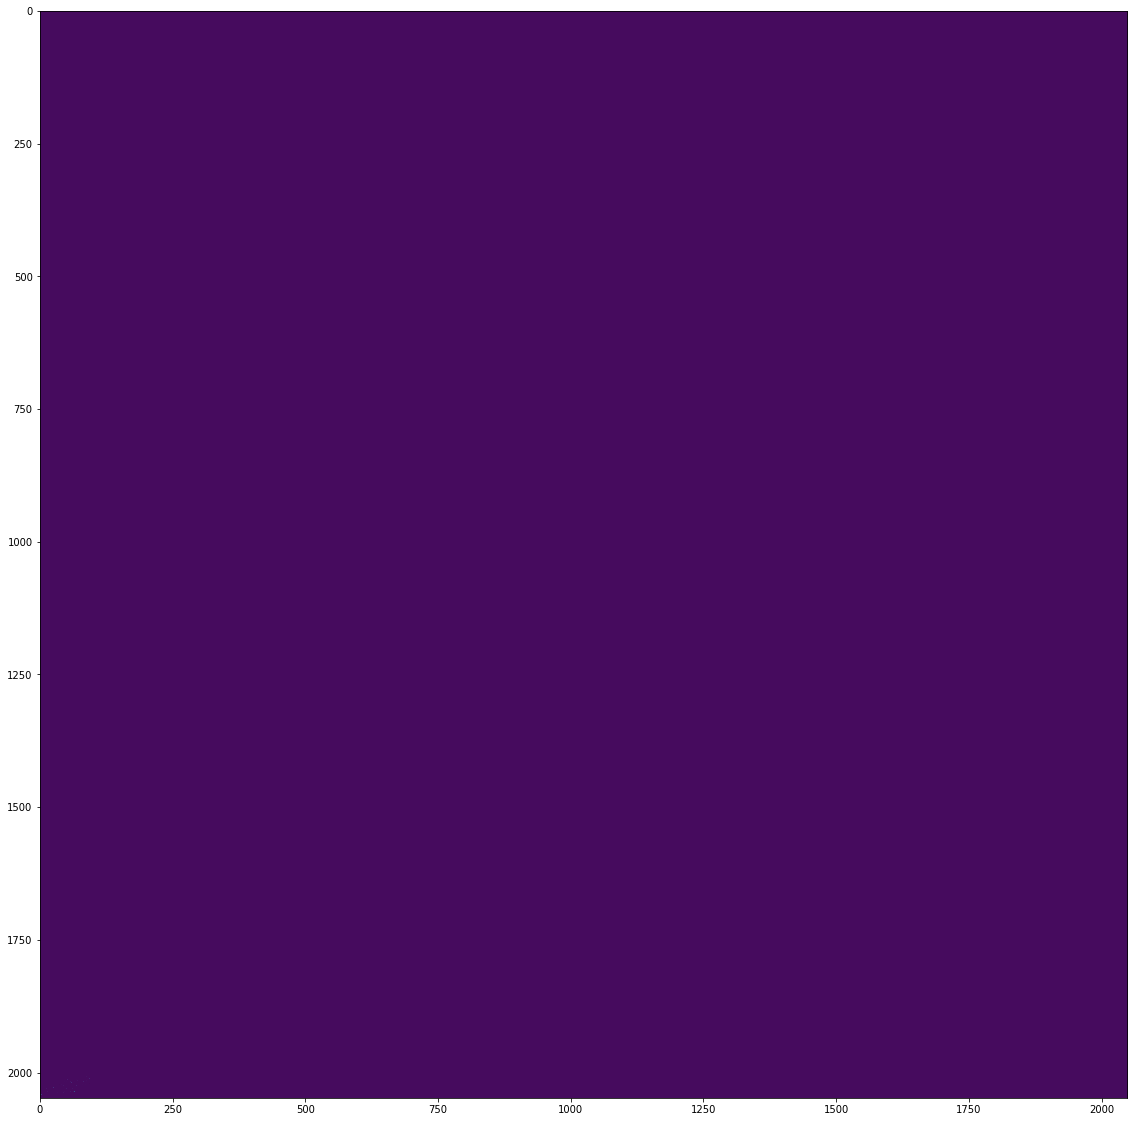

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(mtx)

In [13]:
mtx.min(), mtx.max()

(-0.00199567, 0.0706623)

In [14]:
mtx -= mtx.min()
mtx /= mtx.max()

In [15]:
mtx *= 255
mtx = mtx.astype(np.uint8)

In [34]:
imin, imax, jmin, jmax

(291, 296, 103, 109)

In [6]:
xmin, xmax, ymin, ymax = (-1.4829600609456928,
 -1.453299416580486,
 0.46023782212895525,
 0.48306963010101434)

In [47]:
gn = hp.projector.GnomonicProj(xsize=20480000, ysize=2048000, reso=2, coord='G')

In [27]:
x, y = gn.ang2xy(patch['l'], patch['b'], lonlat=True)

In [31]:
x.min(), x.max(), y.min(), y.max()

(-0.7094002517541491,
 0.555421221687504,
 0.6353993328396157,
 0.8702395945810637)

In [10]:
lb = [(patch['l'][i], patch['b'][i]) 
      for i in range(patch.shape[0]) 
      if not np.isnan(patch['l'][i]) and not np.isnan(patch['b'][i])]

In [54]:
x, y = gn.ang2xy(lb[0], lb[1], lonlat=True)
i, j = gn.xy2ij(x, y)

In [49]:
i.max() - i.min(), j.max() - j.min()

(403, 2174)

In [50]:
x.max() - x.min(), y.max() - y.min()

(1.264821473441653, 0.234840261741448)

In [ ]:
for ii, jj in zip(i, j):
    if 

In [55]:
x -= x.min()
x /= x.max()
x *= 2047
x = x.astype(np.int64)
y -= x.min()
y /= x.max()
y *= 2047
y = y.astype(np.int64)

In [52]:
a = np.zeros((2048,2048), dtype=np.uint8)

In [56]:
a[x, y] = 255

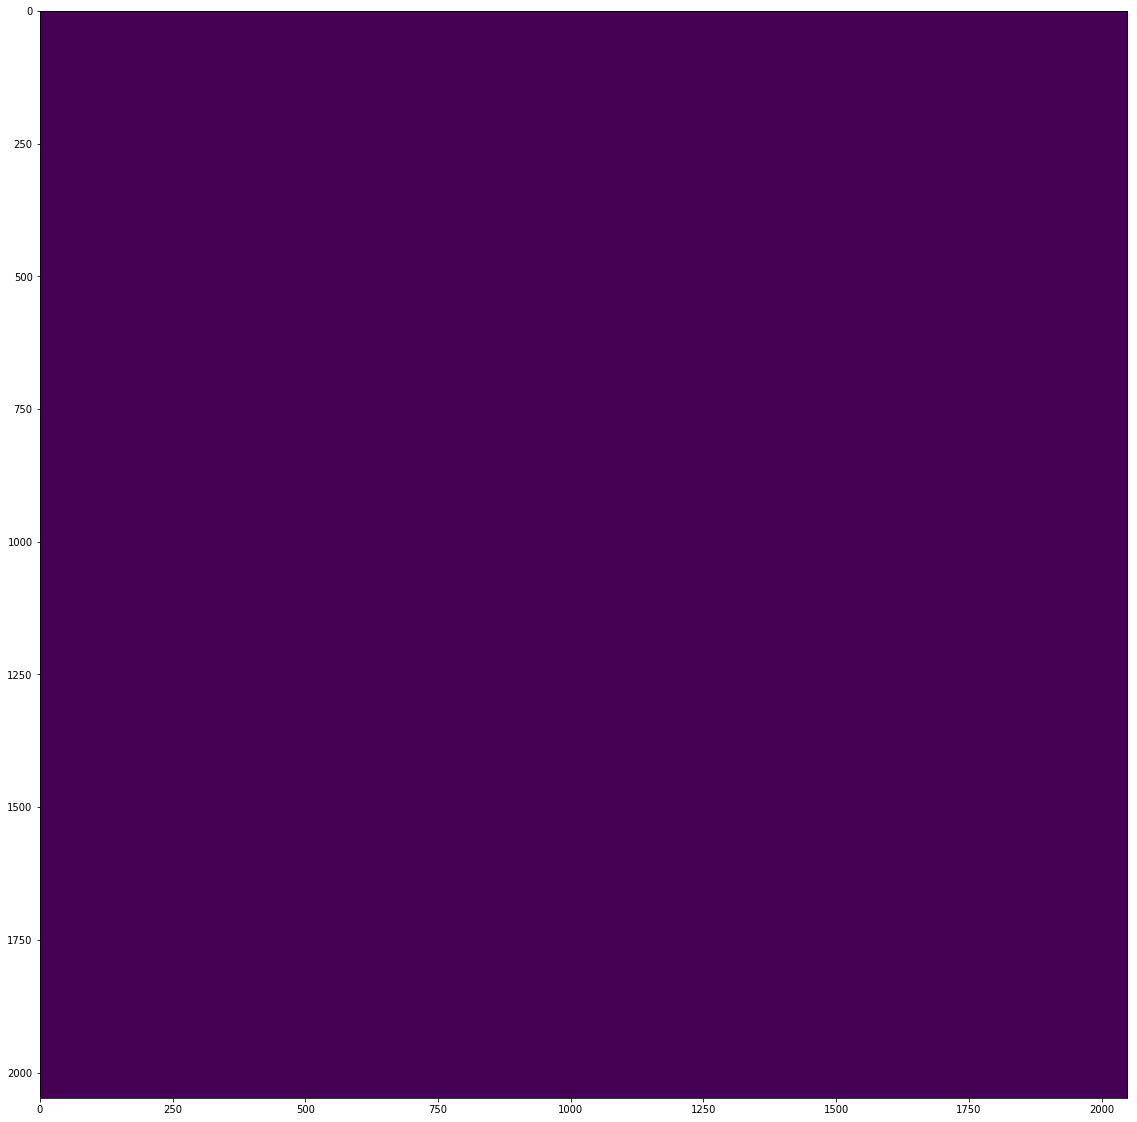

In [58]:
plt.figure(figsize=(20,20))
plt.imshow(a)

In [ ]:
from functools import partial

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Build a map
#nside = 64
#npix = hp.nside2npix(nside)
#hpxmap = np.arange(npix)

# Get the cutout via a cartesian projection
lonra = [30, 40]
latra = [-10, 10]

proj = hp.projector.CartesianProj(
    lonra=lonra, latra=latra,
    coord='G',
    xsize=n_pixels, ysize=n_pixels)
reproj_im = proj.projmap(hpxmap, vec2pix_func=partial(hp.vec2pix, nside))

# Plot the cutout
plt.imshow(reproj_im, origin='lower', interpolation='nearest')

In [3]:
from functools import partial

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Build a map
nside = 2**17
npix = hp.nside2npix(nside)
#hpxmap = np.arange(npix)

# Get the cutout via a cartesian projection
lonra = [148.751256104034, 150.955582612672]
latra = [34.373669513097894, 36.17279037533721]

lonra = np.radians(lonra)
latra = np.radians(latra)

proj = hp.projector.CartesianProj(
    lonra=lonra, latra=latra,
    coord='G',
    xsize=2048, ysize=2048)
#reproj_im = proj.projmap(hpxmap, vec2pix_func=lambda x, y, z:hp.vec2pix(nside=nside, x=x,y=y,z=z, nest=True))

# Plot the cutout
#plt.imshow(reproj_im, origin='lower', interpolation='nearest')

In [5]:
import pandas as pd

In [7]:
patch = pd.read_csv('/home/rt2122/data/new/try/typdat_il2_ip0_ra129.0758_dec65.6675_stcl_in5.csv', 
                    index_col='Unnamed: 0') 

In [64]:
lb[:,0].min(), lb[:,0].max(), lb[:,1].min(), lb[:,1].max()

(148.751256104034, 150.955582612672, 34.373669513097894, 36.17279037533721)

In [63]:
lb = np.array(lb)

In [68]:
reproj_im.min(), reproj_im.max()

(18526821.0, 18526834.0)

In [73]:
patch['pix'].shape

(126247,)

In [9]:
patch.index = np.arange(patch.shape[0])

In [11]:
from tqdm import tqdm_notebook

In [17]:
a = np.zeros((2048,2048), dtype=np.uint8)
xy = proj.ang2xy(lb[0], lb[1], lonlat=True)
ij = proj.xy2ij(xy[0], xy[1])

In [15]:
import matplotlib.pyplot as plt

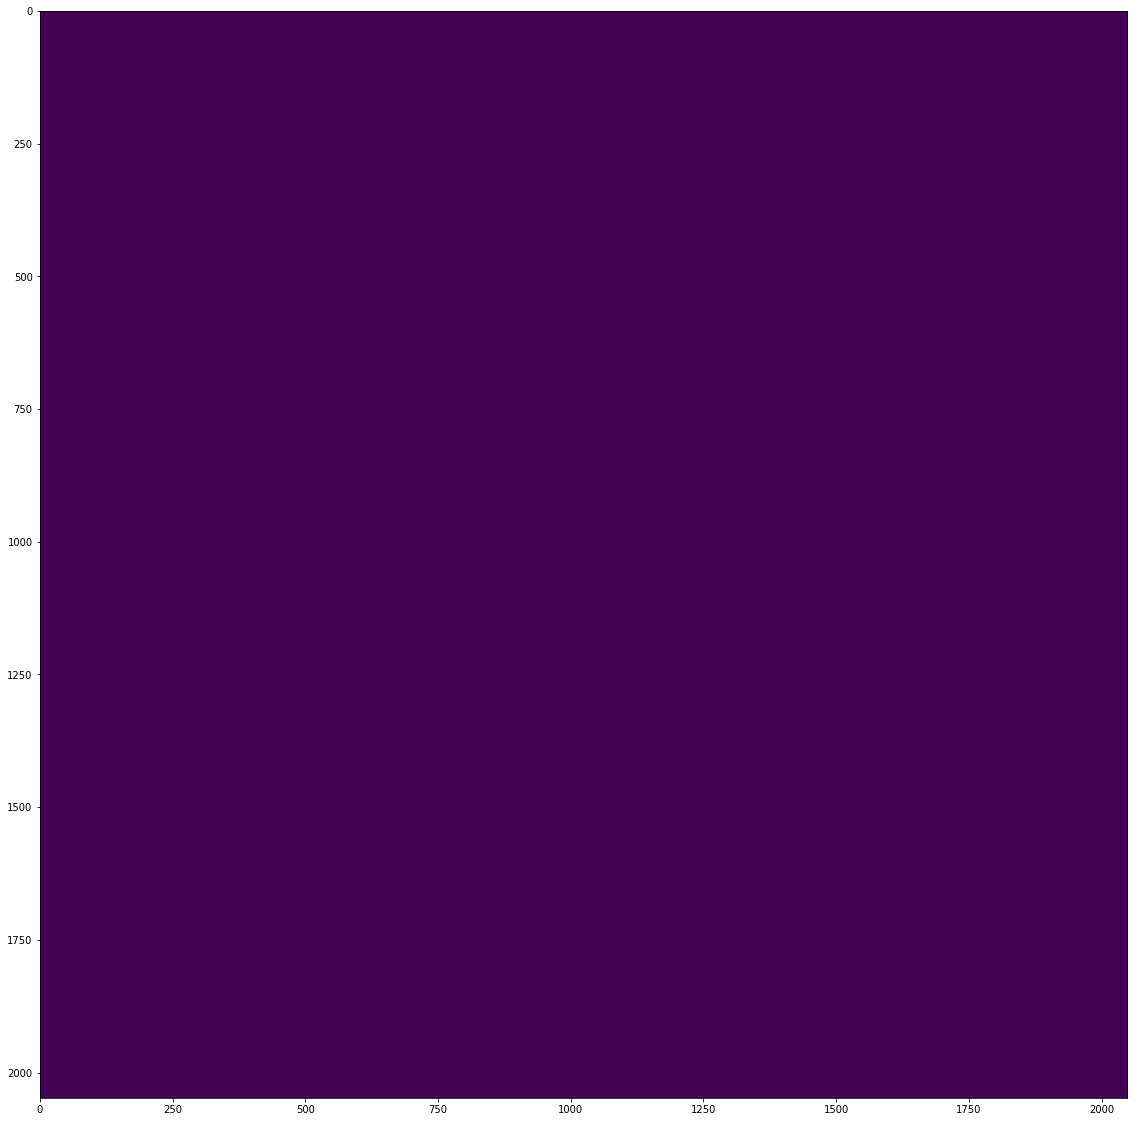

In [16]:
plt.figure(figsize=(20,20))
plt.imshow(a)

In [18]:
ij[0].min(), ij[0].max(), ij[1].min(), ij[1].max()

(masked, masked, masked, masked)

In [19]:
xy[0].min(), xy[0].max(), xy[1].min(), xy[1].max()

(-35.351899126232084,
 29.048722274434983,
 29.050885473248993,
 35.36634935538248)